In [35]:
# Step 1: Import libraries
import pandas as pd       # for working with data
import numpy as np        # for math
import matplotlib.pyplot as plt  # for plots
import seaborn as sns     # for prettier plots

# For the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
# Step 2: Create synthetic(random) housing data
np.random.seed(42) # for reproducibility 42 is just a chosen “magic number” — any integer works.
             #each run would generate different data, making it hard to debug or share your work.

n = 100  # number of houses


# Features
size = np.random.uniform(40, 150, n)     # 40 to 150 m2    for size case is due to it is continous 
                                         #randint for simplicity,
                     #but switching to uniform is a smart upgrade now that you're getting comfortable

bedrooms = np.random.randint(1, 5, n)         # 1 to 4 bedrooms cuz bds are discrete
distance = np.random.uniform(0.5, 20, n)      # 0.5 to 20 km from city center

#All of these are created using NumPy’s random functions, 
#and then combined into a pandas DataFrame:
# Price formula (synthetic)

price = size * 3 + bedrooms * 10 - distance * 2 + np.random.normal(0, 10, n)
#noise refers to any random, irrelevant, or misleading information noise is=+np.ra..part
#in your dataset that interferes with detecting true patterns or relationships.

# Create DataFrame
df = pd.DataFrame({
    'Size': size.round(2),
    'Bedrooms': bedrooms,
    'Distance': distance.round(2),
    'Price': price.round(2)
})

# Show first 5 rows quickly check if everything looks correct.
df.head()


,Size,Bedrooms,Distance,Price
0,81.20,3,18.21,228.71
1,144.58,4,5.17,448.24
2,120.52,3,3.33,380.44
3,105.85,1,10.04,316.03
4,57.16,4,19.72,174.19


In [ ]:
#Step 2 is about creating a fake housing dataset that looks real enough to test algorithms on, 
#so later we can do things like predict house prices.

In [23]:
# Step 3: Data Cleaning & Exploration(EDA)
# Basic info about the dataset

print("Dataset info:")
print(df.info()) #a pandas method that prints a summary of your DataFrame.




Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      100 non-null    float64
 1   Bedrooms  100 non-null    int32  
 2   Distance  100 non-null    float64
 3   Price     100 non-null    float64
dtypes: float64(3), int32(1)
memory usage: 2.9 KB
None


In [24]:
print("\nMissing Value:")      # Check for missing values(part of DataCleaning)
print(df.isnull().sum())

print("\nDuplicate rows:",df.duplicated().sum())  # Check for duplicates


print("\nSummary Statistics:") # Summary statistics
print(df.describe())




Missing Value:
Size        0
Bedrooms    0
Distance    0
Price       0
dtype: int64

Duplicate rows: 0

Summary Statistics:
             Size    Bedrooms    Distance       Price
count  100.000000  100.000000  100.000000  100.000000
mean    91.720100    2.490000   10.576200  278.980000
std     32.723894    1.167705    5.817646   97.045334
min     40.610000    1.000000    0.600000   98.290000
25%     61.252500    1.000000    5.207500  203.567500
50%     91.055000    2.500000   11.455000  277.060000
75%    120.325000    4.000000   15.132500  350.445000
max    148.560000    4.000000   19.720000  474.460000


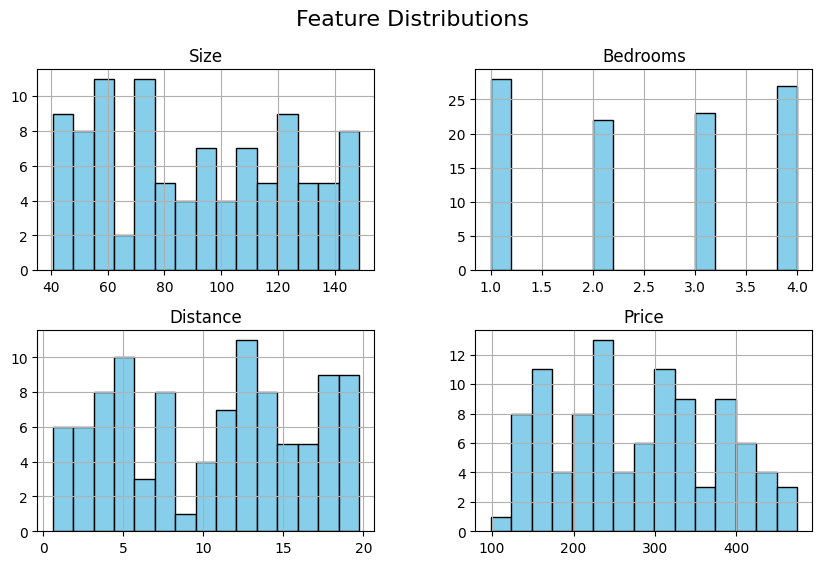

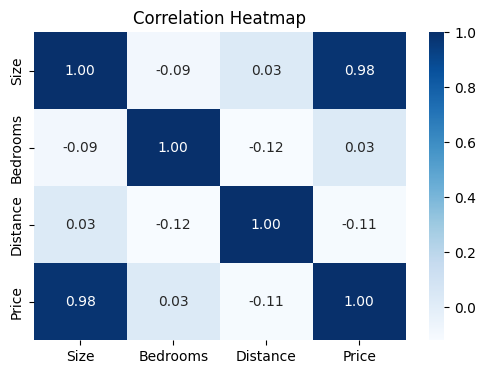

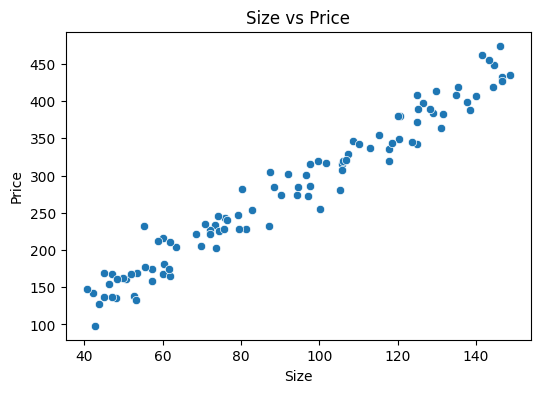

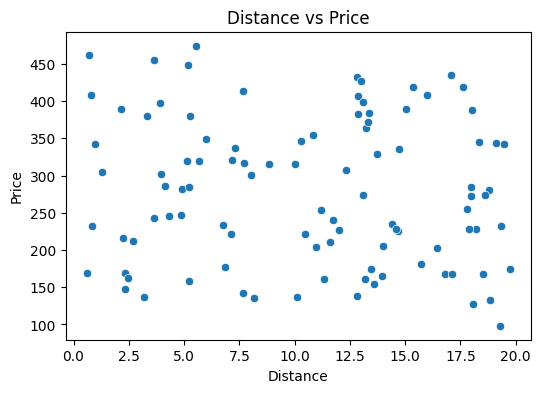

In [25]:
#Step 3B: Visual Exploration (EDA with plots)

# Histograms for each column
df.hist(figsize=(10, 6), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot: Size vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x="Size", y="Price", data=df)
plt.title("Size vs Price")
plt.show()

# Scatter plot: Distance vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x="Distance", y="Price", data=df)
plt.title("Distance vs Price")
plt.show()


Model Evaluation:
R² score: 0.994
MSE: 58.954
RMSE: 7.678

Model Coefficients:
    Feature  Coefficient
0      Size     2.927970
1  Bedrooms     8.861415
2  Distance    -2.064966

Intercept: 10.893881902886335


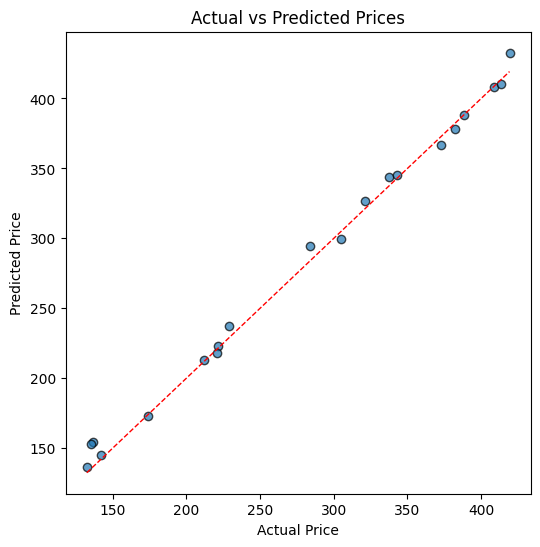

In [36]:
# Step 4: Modeling


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)   # MSE (works in all versions)
rmse = np.sqrt(mse)

print("Model Evaluation:")
print(f"R² score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

# Coefficients + intercept
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coef_df)
print("\nIntercept:", model.intercept_)

# Plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


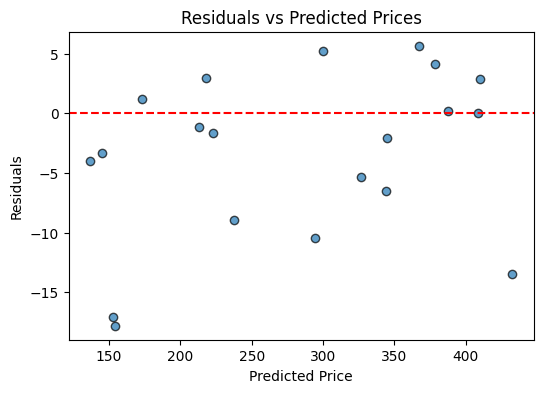

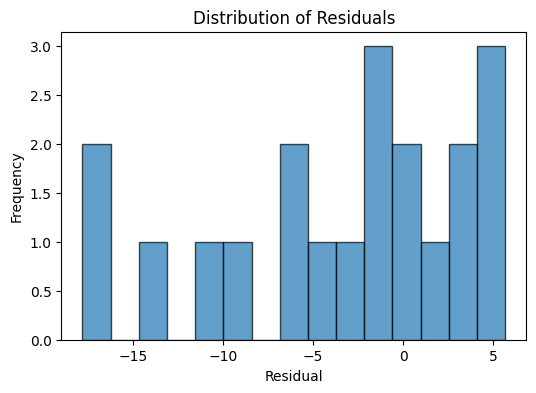

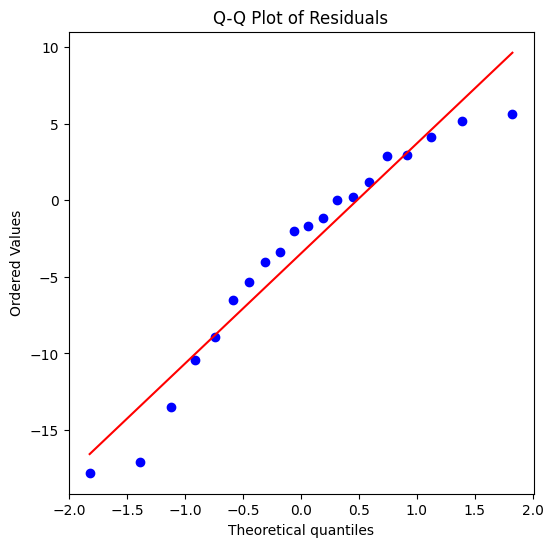

In [37]:
# Step 5: Residual Analysis
residuals = y_test - y_pred

# 1. Residuals vs Predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

# 2. Histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15, edgecolor='k', alpha=0.7)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#Q-Q plot to check normality
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [ ]:
#End